In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
import tensorflow as tf
from ultrayolo import YoloV3, datasets
from ultrayolo.helpers import draw
from pathlib import Path
import numpy as np
import logging

from matplotlib import patches
import matplotlib.pyplot as plt

# Predict using a custom pretrained model
The classes contained in the dataset

In [3]:
classes_dict = datasets.load_classes('./mini_classes.txt', True)
target_shape = (512, 512, 3)
max_objects = 100
num_classes = len(classes_dict)
print(f'number of classes {num_classes}')
classes_dict

number of classes 3


{0: 'bear', 1: 'toaster', 2: 'hair drier'}

In [14]:
anchors = datasets.load_anchors('./mini_anchors.txt')
anchors

array([[ 79.2,  77. ],
       [100.1,  90.2],
       [104.5,  89.1],
       [112.2,  99. ],
       [178.2, 193.6],
       [207.9, 199.1],
       [227.7, 205.7],
       [235.4, 204.6],
       [237.6, 202.4]])

In [15]:
model = YoloV3(target_shape, max_objects, anchors=anchors,
               num_classes=num_classes, score_threshold=0.5, iou_threshold=0.5, 
               training=False, backbone='DenseNet121')

## Load the weights

load a custom model from [here](add a valid link here)

In [16]:
w_path = Path('weights_val.118-7.478.h5')
model.load_weights(w_path)

 54385 MainThread loading checkpoint from /Users/fumarolaf/git/ultrayolo/notebooks/weights_val.118-7.478.h5


## Predict

we predict the objects using an image from the web. You can try with your.

### Bear

(1, 512, 512, 3)

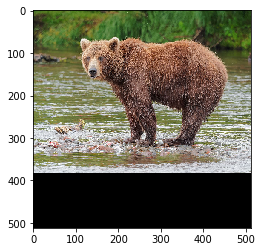

In [45]:
img = datasets.open_image('https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Kamchatka_Brown_Bear_near_Dvuhyurtochnoe_on_2015-07-23.jpg/1200px-Kamchatka_Brown_Bear_near_Dvuhyurtochnoe_on_2015-07-23.jpg')
img_pad = datasets.pad_to_fixed_size(img, target_shape)
img_resized = datasets.resize(img, target_shape)
#preprocess the image
x = np.divide(img_pad, 255.)
x = np.expand_dims(x, 0)
plt.imshow(x[0])
x.shape

### Perform the prediction

In [46]:
boxes, scores, classes, sel = model.predict(x)
print(f'found {sel[0]} objects')

found 1 objects


Show the image with the discovered objects

bear 0.9999901


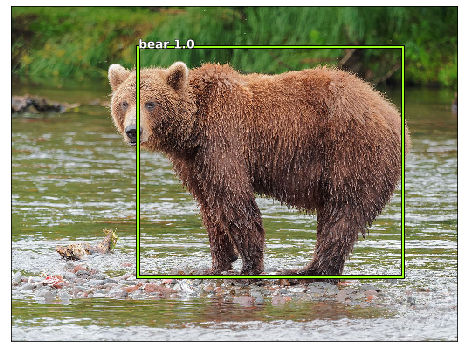

In [47]:
ax = draw.show_img(img_resized, figsize=(8,8))
for i,b in enumerate(boxes[0,:sel[0]]):
    draw.rect(ax, b, color='#9cff1d')
    name_score = f'{classes_dict[classes[0, i]]} {str(round(scores[0,i],2))}'
    draw.text(ax, b[:2], name_score, sz=12)
    print(classes_dict[classes[0, i]], scores[0,i])
    
plt.show()

### Perform a prediction for the class Hair Drier

(1, 512, 512, 3)

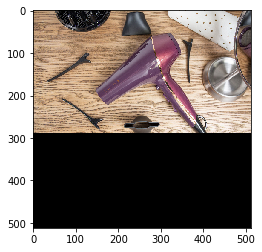

In [48]:
img = datasets.open_image('https://cdn.mos.cms.futurecdn.net/UA2XKzB6zdzm486hC4TXPf.jpg')
# img = datasets.open_image('https://reviewed-com-res.cloudinary.com/image/fetch/s--IAWIW5ff--/b_white,c_limit,cs_srgb,f_auto,fl_progressive.strip_profile,g_center,q_auto,w_1200/https://reviewed-production.s3.amazonaws.com/1521023219800/toaster-newhhero.jpg')
img_pad = datasets.pad_to_fixed_size(img, target_shape)
img_resized = datasets.resize(img, target_shape)
#preprocess the image
x = np.divide(img_pad, 255.)
x = np.expand_dims(x, 0)
plt.imshow(x[0])
x.shape

In [49]:
boxes, scores, classes, sel = model.predict(x)
print(f'found {sel[0]} objects')

found 1 objects


hair drier 0.9821011


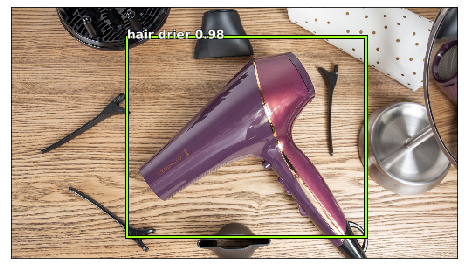

In [50]:
ax = draw.show_img(img_resized, figsize=(8,8))
for i,b in enumerate(boxes[0,:sel[0]]):
    draw.rect(ax, b, color='#9cff1d')
    name_score = f'{classes_dict[classes[0, i]]} {str(round(scores[0,i],2))}'
    draw.text(ax, b[:2], name_score, sz=12)
    print(classes_dict[classes[0, i]], scores[0,i])
    
plt.show()

### Perform a prediction for the class Toaster

(1, 512, 512, 3)

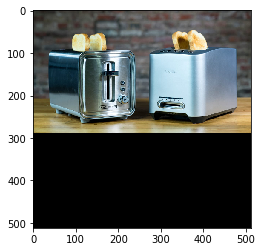

In [52]:
img = datasets.open_image('https://reviewed-com-res.cloudinary.com/image/fetch/s--IAWIW5ff--/b_white,c_limit,cs_srgb,f_auto,fl_progressive.strip_profile,g_center,q_auto,w_1200/https://reviewed-production.s3.amazonaws.com/1521023219800/toaster-newhhero.jpg')
img_pad = datasets.pad_to_fixed_size(img, target_shape)
img_resized = datasets.resize(img, target_shape)
#preprocess the image
x = np.divide(img_pad, 255.)
x = np.expand_dims(x, 0)
plt.imshow(x[0])
x.shape

In [53]:
boxes, scores, classes, sel = model.predict(x)
print(f'found {sel[0]} objects')

found 2 objects


toaster 0.89197004
toaster 0.5734626


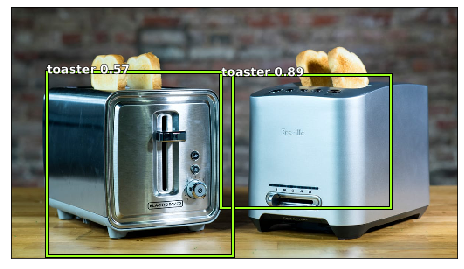

In [54]:
ax = draw.show_img(img_resized, figsize=(8,8))
for i,b in enumerate(boxes[0,:sel[0]]):
    draw.rect(ax, b, color='#9cff1d')
    name_score = f'{classes_dict[classes[0, i]]} {str(round(scores[0,i],2))}'
    draw.text(ax, b[:2], name_score, sz=12)
    print(classes_dict[classes[0, i]], scores[0,i])
    
plt.show()